In [1]:
from src.dataset.create_dataset import *
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

## 2. Loading the dataset

In [2]:
df = read_data()
df.head()

,Unnamed: 0,sid_number,tdcj_number,name,current_facility,gender,race,age,projected_release,maximum_sentence_date,...,case_number,county,offense_code,tdcj_offense,sentence_date,offense_date,sentence_years,last_parole_decision,next_parole_review_date,parole_review_status
0,0,524524,758486,"HARPER,DAVID JOHN JR",Estelle,M,W,93,9999-01-01T00:00:00.000,9999-01-01T00:00:00.000,...,95-765-C,McLennan,11180000,AGG SEXUAL ASSAULT,1996-08-13,1995-09-15,Life,None,08/03/2026,NOT IN REVIEW PROCESS
1,1,703267,841623,"RODRIGUEZ,THEODORE",Hospital Galveston,M,W,84,2022-04-01T00:00:00.000,2043-08-03T00:00:00.000,...,97-396-C,McLennan,11990003,AGG SEX ASLT,1998-08-05,1996-06-01,45.0,Approved on 08/18/2021,NaN,NOT IN REVIEW PROCESS
2,2,770626,449674,"FLORES,ISABEL",Pack,M,H,85,9999-01-01T00:00:00.000,9999-01-01T00:00:00.000,...,86CR-1234-B,Nueces,9150000,MURDER W/DEADLY WPN,1987-04-13,1986-09-02,Life,Denied on 07/21/2021,07/2024,NOT IN REVIEW PROCESS
3,3,771601,1491019,"MOLETT,JOHN HENRY",W. Scott,M,B,79,2037-12-02T00:00:00.000,2037-12-02T00:00:00.000,...,1144294,Harris,12990002,AGG ROBBERY W/DW,2008-02-21,2007-12-03,30.0,None,12/02/2022,NOT IN REVIEW PROCESS
4,4,779423,1241039,"CARAWAY,LEON JR",C.T. Terrell,M,B,84,2023-06-19T00:00:00.000,2023-06-19T00:00:00.000,...,"04CR-16,149",Shelby,11990003,AGG SEXUAL ALST,2004-05-13,1999-07-24,20.0,Denied on 10/30/2019,09/2022,NOT IN REVIEW PROCESS


## 3. Exploratory Data Analysis

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

### Distribution of prisoners by facility

Let's look at the distribution of prisoners by facility. Since facility is a categorical variable, we can use the `value_counts` method to get the number of prisoners in each facility.

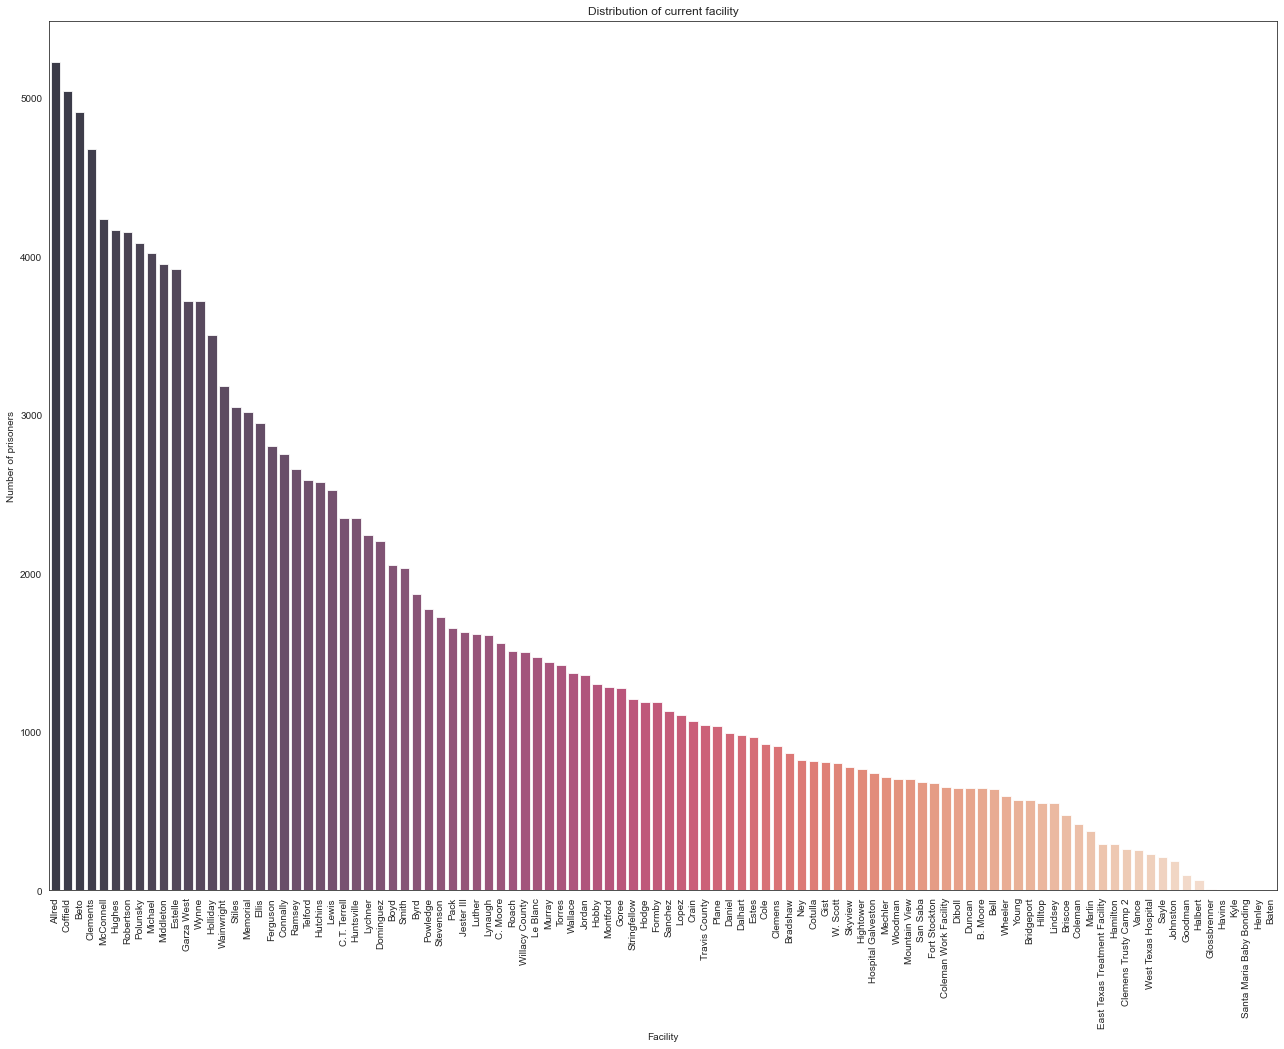

In [4]:
cf = df['current_facility'].value_counts()

fig = plt.figure(figsize=(22, 16))
sns.barplot(x=cf.index, y=cf.values, alpha=0.8, palette='rocket', edgecolor=None)
plt.title('Distribution of current facility')
plt.ylabel('Number of prisoners')
plt.xticks(rotation=90)
plt.xlabel('Facility')
plt.show()

We can see that Allred is the most common facility. We can also see that the number of prisoners in each facility is not uniform.

### What is the distribution of the age of the prisoners?

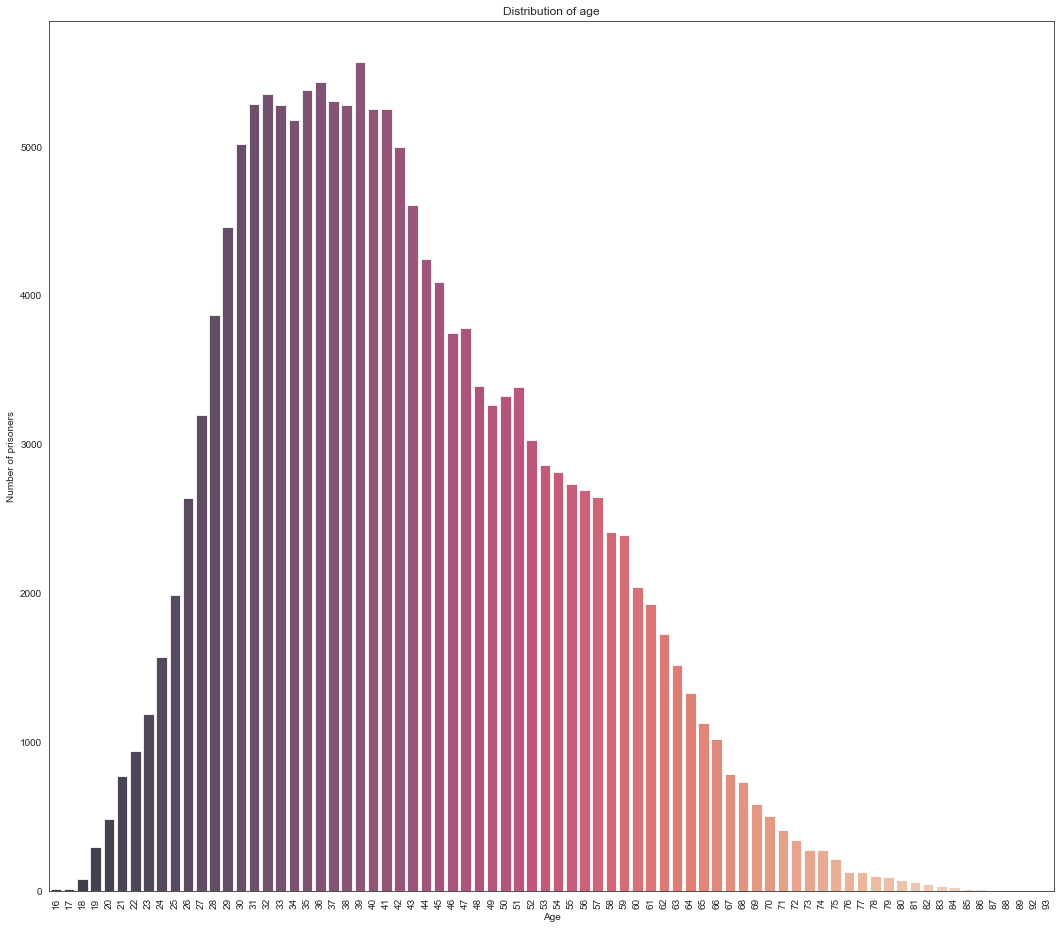

In [36]:
age = df['age'].value_counts()

fig = plt.figure(figsize=(18, 16))
sns.barplot(x=age.index, y=age.values, alpha=0.8, palette='rocket', edgecolor=None)
plt.title('Distribution of age')
plt.ylabel('Number of prisoners')
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.show()

The distribution of age is right skewed and uniform.

### Distribution of race of prisoners

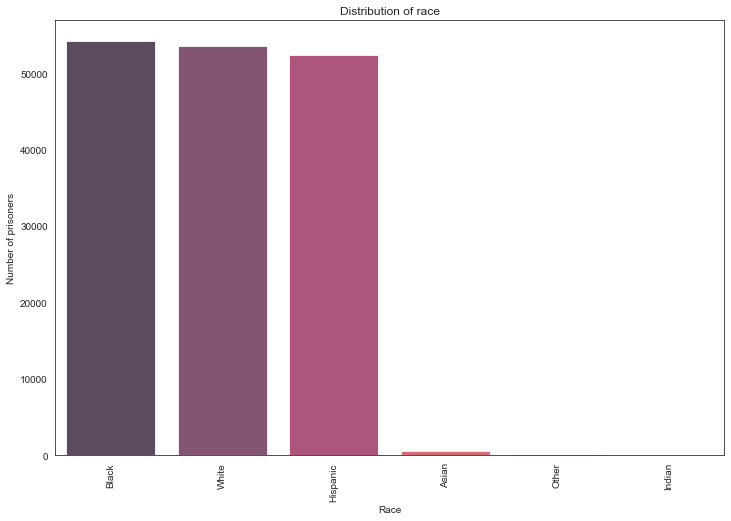

In [10]:
races = {'W': 'White',
         'H': 'Hispanic',
         'B': 'Black',
         'O': 'Other',
         'I': 'Indian',
         'A': 'Asian'}

race = df['race'].map(lambda x: races[x]).value_counts()

fig = plt.figure(figsize=(12, 8))
sns.barplot(x=race.index, y=race.values, alpha=0.8, palette='rocket', edgecolor=None)
plt.title('Distribution of race')
plt.ylabel('Number of prisoners')
plt.xticks(rotation=90)
plt.xlabel('Race')
plt.show()

### Distribution of Gender

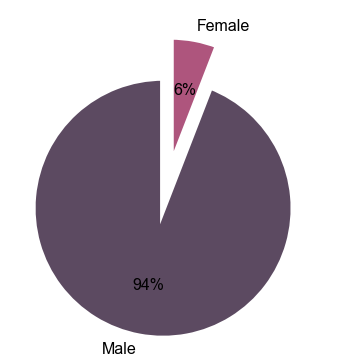

In [37]:
gender = df['gender'].value_counts()

fig = plt.figure(figsize=(12, 6))
plt.pie(gender, labels=['Male', 'Female'], autopct='%0.0f%%', explode=[0.3,0.02], startangle=90, textprops={'color': 'black', 'fontsize': 16}, wedgeprops={'linewidth': 6}, center=(0.1, 0.1), colors=['#5c4a61', '#ae557d'])
plt.show()

## 4. Pipeline

### Scrape data (scrape from socrata API and save to AWS S3)

In [34]:
!python ../main/scrape.py

### Clean and transform data (remove duplicates, remove missing values, convert categorical variables to numerical variables etc. -> save to AWS S3)

In [ ]:
!python ../main/clean.py

### Generate features (generate features from the data -> save to AWS S3)

In [ ]:
!python ../main/feature_engineering.py

### Train model (train the model -> save the model to AWS S3)

In [ ]:
!python ../main/train_model.py